В данном проекте наша задача понять, какой тариф приносит «Мегалайну» больше денег, для того чтобы скорретировать рекламный бюджет.
В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей
«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

Описание данных

Таблица users (информация о пользователях):

user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tariff — название тарифного плана

Таблица calls (информация о звонках):

id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок


Таблица messages (информация о сообщениях):

id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение


Таблица internet (информация об интернет-сессиях):

id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя


Таблица tariffs (информация о тарифах):

tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


### Шаг 1. Откроем файл с данными и изучим общую информацию. 


In [141]:
import pandas as pd #импорт необходимых библиотек
import matplotlib.pyplot as plt #импортируем библиотеку для построения графика
import numpy as np
from functools import reduce
from scipy import stats as st

Все данные оператора в датафрейме bi

In [142]:
bi=pd.read_excel("data.xlsx")

In [143]:
bi

,phone,paysum,paycount,maxpayment,CAT,citycount,federalOkrugsCount,paymentRegions,Unnamed: 8,phone2,paysum2,paycount2,maxpayment2,CAT2,citycount2,federalOkrugsCount2,paymentRegions2
0,9.001992e+09,1475.0,20.0,300.0,1.0,2.0,2.0,5.0,NaN,9000126810,100.00,1,100.0,3,1,1,5
1,9.002024e+09,280.0,8.0,60.0,3.0,1.0,1.0,5.0,NaN,9001940008,997.00,30,100.0,2,2,1,5
2,9.002024e+09,1953.0,26.0,200.0,1.0,2.0,2.0,5.0,NaN,9001970406,150.00,1,150.0,3,1,1,5
3,9.002032e+09,50.0,1.0,50.0,3.0,1.0,1.0,5.0,NaN,9001970852,100.00,1,100.0,3,1,1,5
4,9.002194e+09,2644.0,54.0,100.0,3.0,4.0,2.0,5.0,NaN,9001971206,2234.00,9,1000.0,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9033417150,9208.00,44,3560.0,1,4,2,5
156756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9033417635,850.00,9,150.0,3,2,2,5
156757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9033417795,1300.00,12,200.0,3,5,4,3
156758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9033418021,510.00,5,110.0,3,1,1,5


Разделим датасет на 2 датафрейма b1 - данные по абонентам, звонившим клиенту и b2 - случайная выборка абонентов

In [144]:
b1=bi[['paysum','paycount','maxpayment','CAT','citycount','federalOkrugsCount','paymentRegions']]

In [145]:
b2=bi[['paysum2','paycount2','maxpayment2','CAT2','citycount2','federalOkrugsCount2','paymentRegions2']]

Проведем предобработку данных

In [146]:
b1=b1.dropna()
b2=b2.dropna()

In [147]:
b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63837 entries, 0 to 63836
Data columns (total 7 columns):
paysum                63837 non-null float64
paycount              63837 non-null float64
maxpayment            63837 non-null float64
CAT                   63837 non-null float64
citycount             63837 non-null float64
federalOkrugsCount    63837 non-null float64
paymentRegions        63837 non-null float64
dtypes: float64(7)
memory usage: 3.9 MB


In [148]:
b2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156760 entries, 0 to 156759
Data columns (total 7 columns):
paysum2                156760 non-null float64
paycount2              156760 non-null int64
maxpayment2            156760 non-null float64
CAT2                   156760 non-null int64
citycount2             156760 non-null int64
federalOkrugsCount2    156760 non-null int64
paymentRegions2        156760 non-null int64
dtypes: float64(2), int64(5)
memory usage: 9.6 MB


In [149]:
b1['paysum']=b1['paysum'].astype('int')
b1['paycount']=b1['paycount'].astype('int')
b1['maxpayment']=b1['maxpayment'].astype('int')
b1['CAT']=b1['CAT'].astype('int')
b1['citycount']=b1['citycount'].astype('int')
b1['federalOkrugsCount']=b1['federalOkrugsCount'].astype('int')
b1['paymentRegions']=b1['paymentRegions'].astype('int')

In [150]:
b2['paysum2']=b2['paysum2'].astype('int')
b2['paycount2']=b2['paycount2'].astype('int')
b2['maxpayment2']=b2['maxpayment2'].astype('int')
b2['CAT2']=b2['CAT2'].astype('int')
b2['citycount2']=b2['citycount2'].astype('int')
b2['federalOkrugsCount2']=b2['federalOkrugsCount2'].astype('int')
b2['paymentRegions2']=b2['paymentRegions2'].astype('int')

In [151]:
b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63837 entries, 0 to 63836
Data columns (total 7 columns):
paysum                63837 non-null int64
paycount              63837 non-null int64
maxpayment            63837 non-null int64
CAT                   63837 non-null int64
citycount             63837 non-null int64
federalOkrugsCount    63837 non-null int64
paymentRegions        63837 non-null int64
dtypes: int64(7)
memory usage: 3.9 MB


In [152]:
b2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156760 entries, 0 to 156759
Data columns (total 7 columns):
paysum2                156760 non-null int64
paycount2              156760 non-null int64
maxpayment2            156760 non-null int64
CAT2                   156760 non-null int64
citycount2             156760 non-null int64
federalOkrugsCount2    156760 non-null int64
paymentRegions2        156760 non-null int64
dtypes: int64(7)
memory usage: 9.6 MB


Просмотрим данные

In [153]:
b1

,paysum,paycount,maxpayment,CAT,citycount,federalOkrugsCount,paymentRegions
0,1475,20,300,1,2,2,5
1,280,8,60,3,1,1,5
2,1953,26,200,1,2,2,5
3,50,1,50,3,1,1,5
4,2644,54,100,3,4,2,5
...,...,...,...,...,...,...,...
63832,35,2,20,3,2,1,5
63833,264,4,100,3,3,2,5
63834,1070,32,50,3,2,2,5
63835,380,11,50,3,2,1,5


In [154]:
b2

,paysum2,paycount2,maxpayment2,CAT2,citycount2,federalOkrugsCount2,paymentRegions2
0,100,1,100,3,1,1,5
1,997,30,100,2,2,1,5
2,150,1,150,3,1,1,5
3,100,1,100,3,1,1,5
4,2234,9,1000,1,1,1,5
...,...,...,...,...,...,...,...
156755,9208,44,3560,1,4,2,5
156756,850,9,150,3,2,2,5
156757,1300,12,200,3,5,4,3
156758,510,5,110,3,1,1,5


In [155]:
b1['paysum']=b1['paysum'].astype(int)

Выведем основные статистические показатели по датафреймам

In [156]:
b1.describe()

,paysum,paycount,maxpayment,CAT,citycount,federalOkrugsCount,paymentRegions
count,6.383700e+04,63837.000000,63837.000000,63837.000000,63837.000000,63837.000000,63837.000000
mean,4.485407e+03,21.158419,777.457854,2.770776,2.845434,1.781412,4.480834
std,2.130068e+04,24.824073,6098.786561,0.606050,2.169042,0.662900,1.051495
min,-6.450000e+03,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,4.900000e+02,6.000000,100.000000,3.000000,2.000000,1.000000,5.000000
50%,1.250000e+03,14.000000,150.000000,3.000000,2.000000,2.000000,5.000000
75%,3.110000e+03,28.000000,300.000000,3.000000,3.000000,2.000000,5.000000
max,2.474908e+06,1278.000000,786802.000000,3.000000,63.000000,9.000000,5.000000


In [157]:
b2.describe()

,paysum2,paycount2,maxpayment2,CAT2,citycount2,federalOkrugsCount2,paymentRegions2
count,1.567600e+05,156760.000000,1.567600e+05,156760.000000,156760.000000,156760.000000,156760.000000
mean,5.635824e+03,22.002150,7.668550e+02,2.692945,2.247933,1.456156,4.548207
std,9.156113e+04,121.307225,7.665428e+03,0.604950,2.209693,0.557940,1.021511
min,-6.652000e+03,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,5.000000e+02,5.000000,1.000000e+02,3.000000,1.000000,1.000000,5.000000
50%,1.300000e+03,13.000000,1.500000e+02,3.000000,2.000000,1.000000,5.000000
75%,3.037000e+03,27.000000,3.400000e+02,3.000000,3.000000,2.000000,5.000000
max,2.202990e+07,45383.000000,1.363558e+06,3.000000,624.000000,9.000000,5.000000


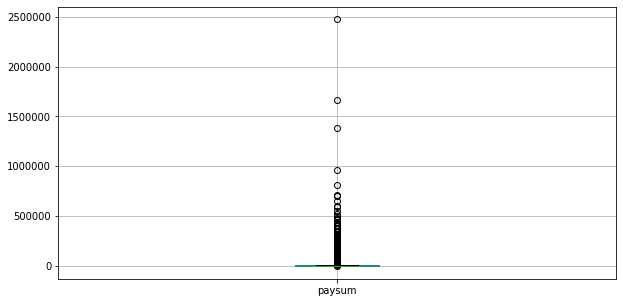

In [158]:
b1.boxplot(figsize=(10, 5), column='paysum')

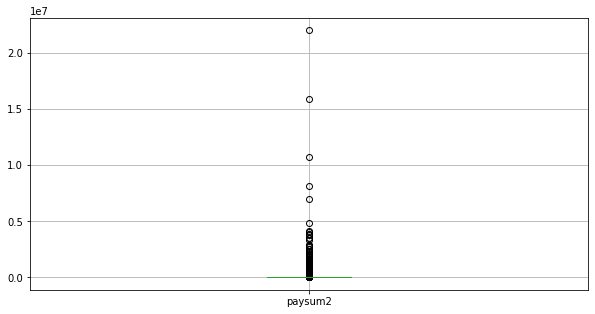

In [159]:
b2.boxplot(figsize=(10, 5), column='paysum2')

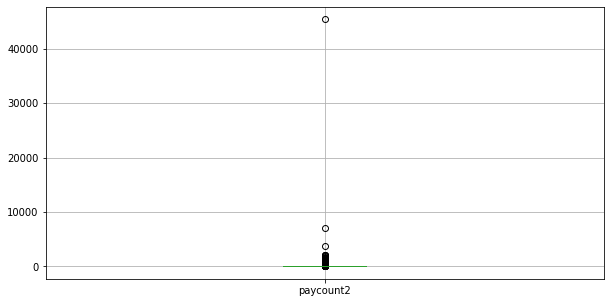

In [160]:
b2.boxplot(figsize=(10, 5), column='paycount2')

Есть выбросы по сумме платежей, по максимальной сумме платежа, по количеству платежей. Присутствуют отрицательные значения суммы платежей за период. Количество городов, в которых платили абоненты тоже с выбросами (63 города за период), у абонентов случайной выборки в 2 раза меньше. Максимальная сумма платежей за период у абонентов случайной выборки достигает 22029895, что в 9 раз больше, чем у абонентов, звонивших клиенту. Средняя Сумма платежей за период у абонентов, звонивших клиенту, меньше на 1200 чем у случайной выборки клиентов. Средний максимальный платеж незначительно выше у абонентов, звонивших клиенту. Присутствует зависимость количества платежей, максимальной суммы платежа между суммой платежей, которая отсутствует у абонентов из случайной выборки. Удалим выбросы, так как возможно допущена ошибка в данных.

In [161]:
b1=b1.query('paysum>0 and paysum<200000 and citycount<30 and paycount<80')

In [162]:
b2=b2.query('paysum2>0 and paysum2<200000 and citycount2<30 and paycount2<80')

In [163]:
b1.describe()

,paysum,paycount,maxpayment,CAT,citycount,federalOkrugsCount,paymentRegions
count,61924.000000,61924.000000,61924.000000,61924.000000,61924.000000,61924.000000,61924.000000
mean,3462.309944,18.262919,662.667883,2.784316,2.763242,1.768442,4.494009
std,9479.040712,16.369518,2008.027197,0.588985,1.963756,0.656554,1.046848
min,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,460.000000,6.000000,100.000000,3.000000,2.000000,1.000000,5.000000
50%,1190.000000,13.000000,150.000000,3.000000,2.000000,2.000000,5.000000
75%,2819.250000,26.000000,300.000000,3.000000,3.000000,2.000000,5.000000
max,194298.000000,79.000000,80703.000000,3.000000,29.000000,9.000000,5.000000


In [164]:
b2.describe()

,paysum2,paycount2,maxpayment2,CAT2,citycount2,federalOkrugsCount2,paymentRegions2
count,151025.000000,151025.000000,151025.000000,151025.000000,151025.000000,151025.000000,151025.000000
mean,3226.884880,17.392326,624.647085,2.706724,2.185492,1.444211,4.553955
std,9171.802641,16.262292,2335.976871,0.587429,1.386977,0.549418,1.021963
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,500.000000,5.000000,100.000000,3.000000,1.000000,1.000000,5.000000
50%,1220.000000,12.000000,150.000000,3.000000,2.000000,1.000000,5.000000
75%,2750.000000,25.000000,300.000000,3.000000,3.000000,2.000000,5.000000
max,199650.000000,79.000000,180925.000000,3.000000,29.000000,7.000000,5.000000


Построим гистограмму, показывающую кому платили абоненты: 
1 – платили один раз в QIWI WALLET, 
2 – платили в пользу других провайдеров, 
3 – платили в пользу сотовых операторов.

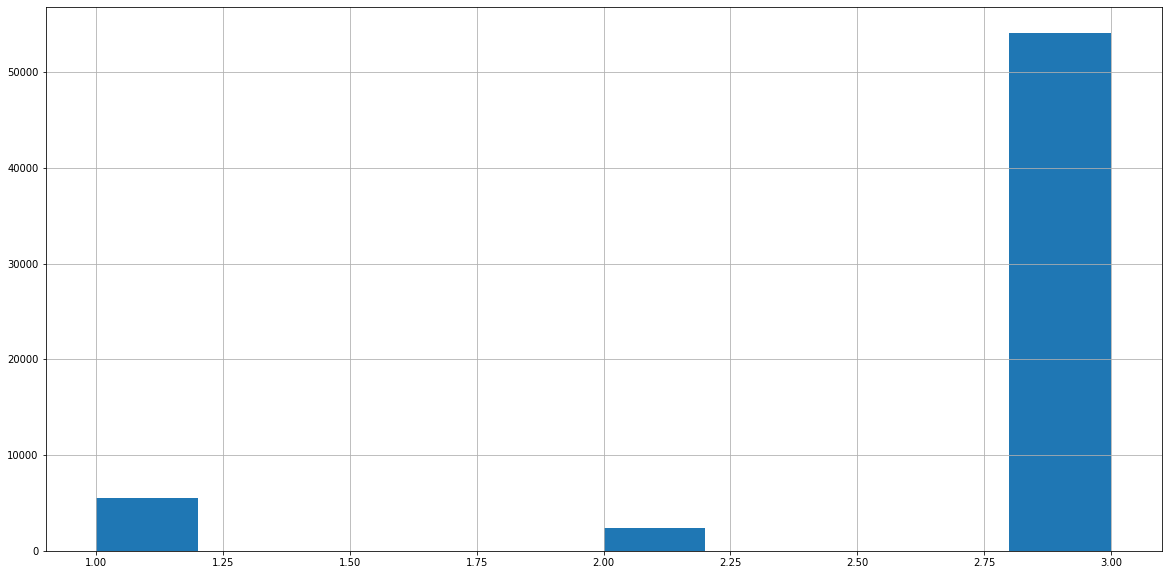

In [165]:
b1['CAT'].hist(figsize=(20, 10))

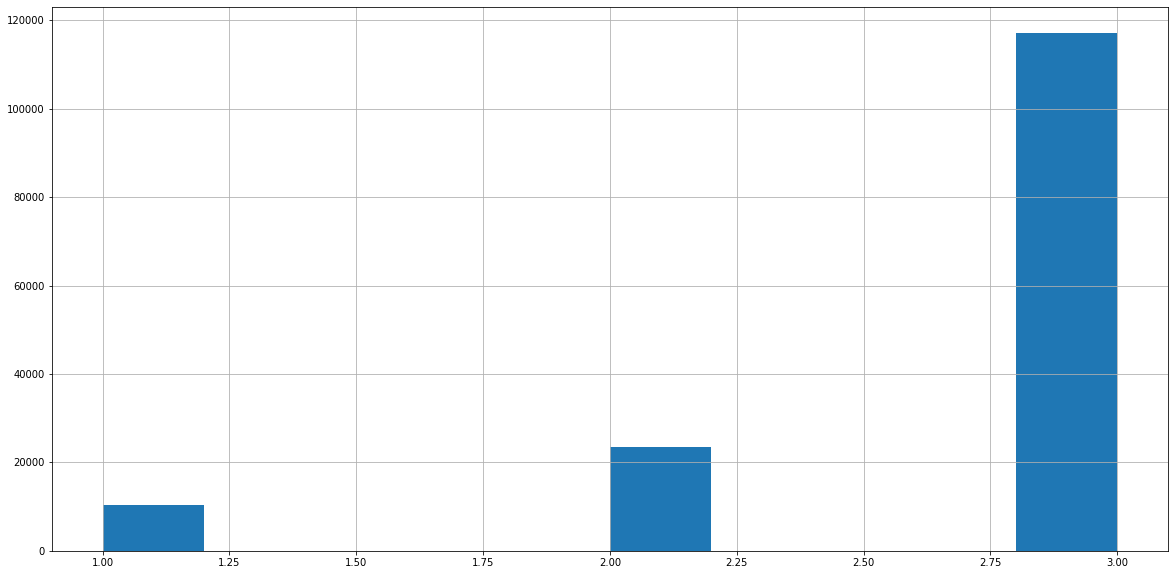

In [166]:
b2['CAT2'].hist(figsize=(20, 10))

В обеих выборках максимальное количество абонентов платили в пользу операторов, а вот на втором месте случайная выборка платила в пользу случайных провайдеров, а абоненты, звонившие клиенту, платили в qiwi один раз

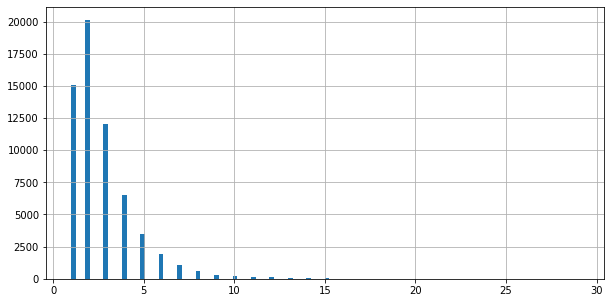

In [167]:
b1['citycount'].hist(figsize=(10, 5), bins=110)

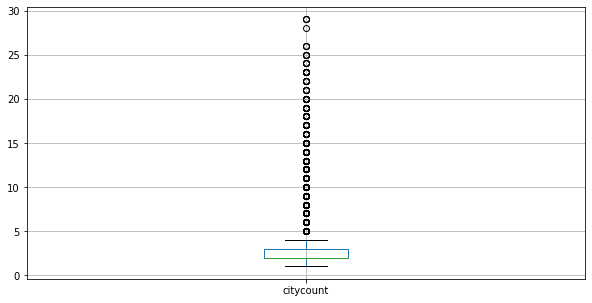

In [168]:
b1.boxplot(figsize=(10, 5), column='citycount')

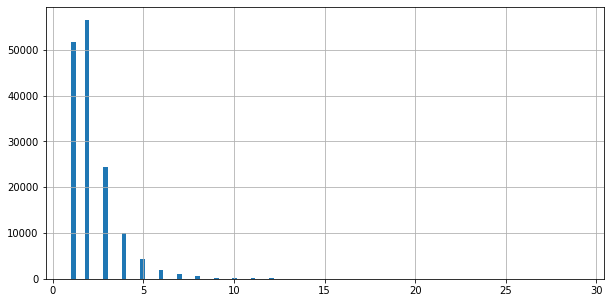

In [169]:
b2['citycount2'].hist(figsize=(10, 5),bins=110)

Построим гистограмму, отражающую количество федеральных округов из которых платили абоненты.

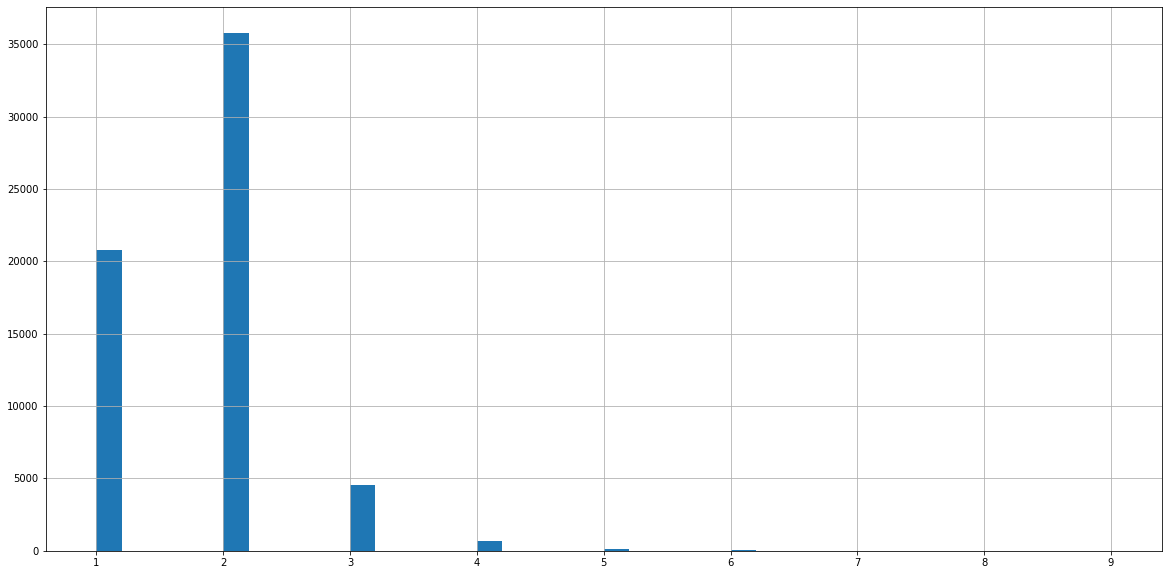

In [170]:
b1['federalOkrugsCount'].hist(figsize=(20, 10), bins=40)

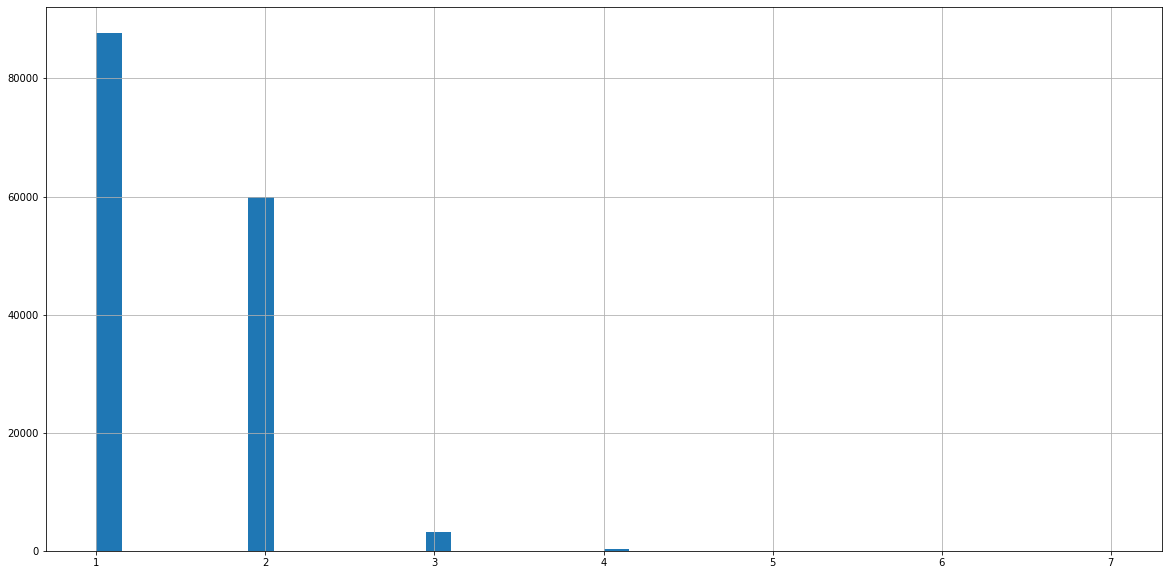

In [171]:
b2['federalOkrugsCount2'].hist(figsize=(20, 10), bins=40)

Можно сделать вывод о том, что в большинство абонентов, звонивших клиенту, чаще платят в 2 федеральных округах, а большинство абонентов случайной выборки платят в одном федеральном округе.

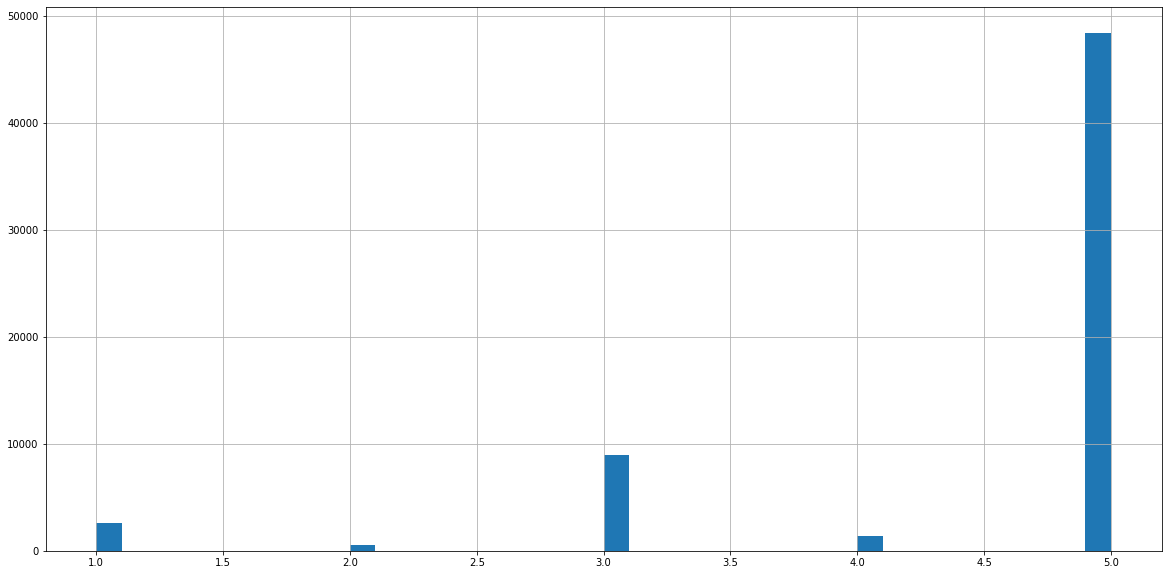

In [172]:
b1['paymentRegions'].hist(figsize=(20, 10), bins=40)

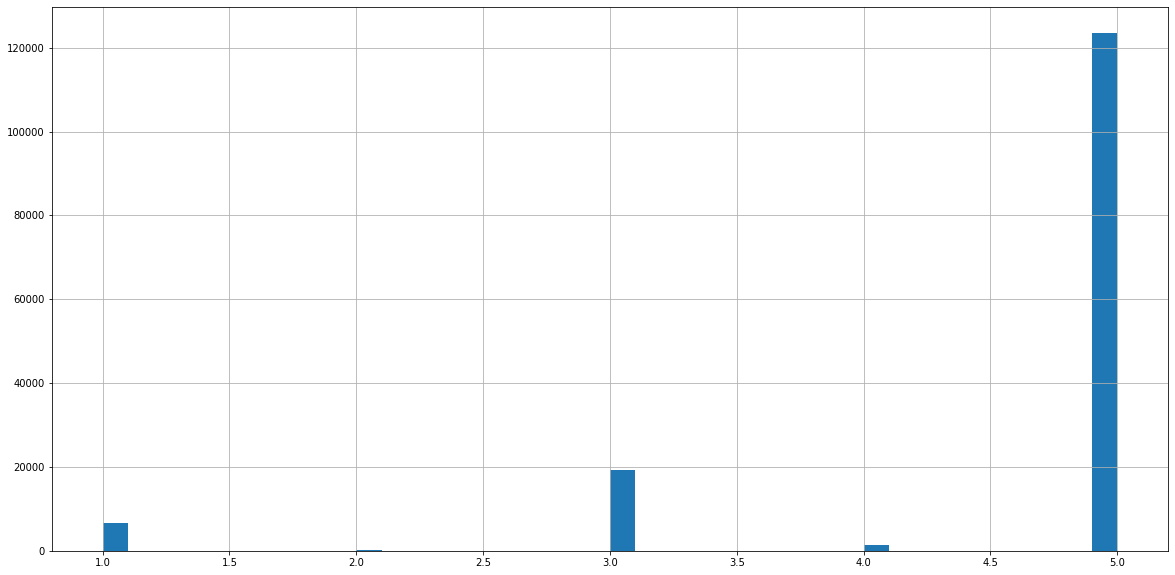

In [173]:
b2['paymentRegions2'].hist(figsize=(20, 10), bins=40)

По регионам оплаты значительной разницы между двумя выборками нет.

Провердем корреляционный анализ, чтобы выявить взаимосвязи внутри датафрейма

In [174]:
b1.corr()

,paysum,paycount,maxpayment,CAT,citycount,federalOkrugsCount,paymentRegions
paysum,1.000000,0.360144,0.737366,-0.488195,0.168835,0.138609,-0.050644
paycount,0.360144,1.000000,0.197151,-0.202967,0.443742,0.341284,-0.089059
maxpayment,0.737366,0.197151,1.000000,-0.503662,0.124028,0.114422,-0.044794
CAT,-0.488195,-0.202967,-0.503662,1.000000,-0.066155,-0.067891,-0.019932
citycount,0.168835,0.443742,0.124028,-0.066155,1.000000,0.595933,-0.181584
federalOkrugsCount,0.138609,0.341284,0.114422,-0.067891,0.595933,1.000000,-0.079638
paymentRegions,-0.050644,-0.089059,-0.044794,-0.019932,-0.181584,-0.079638,1.000000


In [175]:
b2.corr()

,paysum2,paycount2,maxpayment2,CAT2,citycount2,federalOkrugsCount2,paymentRegions2
paysum2,1.000000,0.317469,0.695275,-0.346577,0.159287,0.148246,-0.102825
paycount2,0.317469,1.000000,0.129987,-0.117212,0.398009,0.233364,-0.047877
maxpayment2,0.695275,0.129987,1.000000,-0.261197,0.093384,0.098716,-0.076348
CAT2,-0.346577,-0.117212,-0.261197,1.000000,-0.034029,-0.070473,-0.058648
citycount2,0.159287,0.398009,0.093384,-0.034029,1.000000,0.442151,-0.179525
federalOkrugsCount2,0.148246,0.233364,0.098716,-0.070473,0.442151,1.000000,-0.210479
paymentRegions2,-0.102825,-0.047877,-0.076348,-0.058648,-0.179525,-0.210479,1.000000


Наблюдается небольшая отрицательная зависимость между тем, кому платили клиенты и суммой платежа за период у абонентов, звонивших клиенту. У случайной выборки эта зависимость меньше.
Так же у абонентов, звонивших клиенту, зависимость количества платежей и максимального платежа незначительно выше, чем у абонентов случайной выборки. 

In [176]:
calls=pd.read_csv("/datasets/calls.csv") #прочитаем и разделим на столбцы информацию, слившуюся в одну строчку 
calls.info() # изучаю общую информацию по дата фрейму
calls.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
95,1000_95,2018-10-15,9.88,1000
96,1000_96,2018-07-03,9.22,1000
97,1000_97,2018-10-26,0.33,1000
98,1000_98,2018-11-18,7.68,1000


In [177]:
#округлим значение длительности звонков в большую сторону, изменим тип на целочисленное значение
calls['duration']=np.ceil(calls['duration'], out=None).astype('int')
calls.head(100)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
95,1000_95,2018-10-15,10,1000
96,1000_96,2018-07-03,10,1000
97,1000_97,2018-10-26,1,1000
98,1000_98,2018-11-18,8,1000


In [178]:
#избавимся от звонков длительностью 0.0 секунд, так как скорее всего это недозвоны
calls=calls.query('duration>0')
calls.head(20)
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null object
duration     162994 non-null int64
user_id      162994 non-null int64
dtypes: int64(2), object(2)
memory usage: 6.2+ MB


Удалила все недозвоны, сократили таблицу на 25%.

In [179]:
#меняю тип данных в столбце с датой звонка 
calls['call_date']=pd.to_datetime(calls['call_date'])

In [180]:
#добавляю отдельный столбец с месяцем звонка
calls['month']=calls['call_date'].dt.month

In [181]:
#создаю сводную таблицу п опользователю и месяцу звонка
calls_pivot=calls.pivot_table(index=('user_id','month'), values='duration', aggfunc='sum')
calls_pivot
data_calls = calls_pivot.reset_index() #создаю из сводной таблицы датафрейм
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 3 columns):
user_id     3168 non-null int64
month       3168 non-null int64
duration    3168 non-null int64
dtypes: int64(3)
memory usage: 74.4 KB


In [182]:
data_calls

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
...,...,...,...
3163,1498,10,247
3164,1499,9,70
3165,1499,10,449
3166,1499,11,612


In [183]:
internet=pd.read_csv("/datasets/internet.csv") #прочитаем файл по интернету
internet.info() # изучаю общую информацию по датафрейму
internet.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
95,95,1000_95,250.35,2018-06-29,1000
96,96,1000_96,544.22,2018-05-28,1000
97,97,1000_97,568.45,2018-10-14,1000
98,98,1000_98,775.25,2018-07-13,1000


In [184]:
#меняю тип данных в столбце с датой сессии в интернете
internet['session_date']=pd.to_datetime(internet['session_date'])

In [185]:
#добавляю отдельный столбец с месяцем сессии в интернете
internet['month']=internet['session_date'].dt.month

In [186]:
#создаю сводную таблицу п опользователю и месяцу звонка
internet_pivot=internet.pivot_table(index=('user_id','month'), values='mb_used', aggfunc='sum')
internet_pivot

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

In [187]:
data_internet = internet_pivot.reset_index() #создаю из сводной таблицы датафрейм
data_internet

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [188]:
#Превратим Mb в Gb 
data_internet['mb_used']=data_internet['mb_used']/1024

In [189]:
#переименуем столбец и переименуем столбец в Gb  
data_internet.columns=['user_id','month','gb_used']

In [190]:
#округлим значение Gb в большую сторону, изменим тип на целочисленное значение
data_internet['gb_used']=np.ceil(data_internet['gb_used'], out=None).astype('int')
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
user_id    3203 non-null int64
month      3203 non-null int64
gb_used    3203 non-null int64
dtypes: int64(3)
memory usage: 75.2 KB


In [191]:
messages=pd.read_csv("/datasets/messages.csv") #прочитаем информацию
messages.info() # изучаю общую информацию по датафрейму
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [192]:
#меняю тип данных в столбце с датой сообщения
messages['message_date']=pd.to_datetime(messages['message_date'])

In [193]:
#добавляю отдельный столбец с месяцем сообщения
messages['month']=messages['message_date'].dt.month

In [194]:
#создаю сводную таблицу по пользователю и месяцу сообщения
messages_pivot=messages.pivot_table(index=('user_id','month'), values=("id"), aggfunc='count')
messages_pivot
messages_pivot.columns=['messages_used'] #меняю заглавие столбца
data_messages = messages_pivot.reset_index() #создаю из сводной таблицы датафрейм
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
user_id          2717 non-null int64
month            2717 non-null int64
messages_used    2717 non-null int64
dtypes: int64(3)
memory usage: 63.8 KB


In [195]:
tariffs=pd.read_csv("/datasets/tariffs.csv") #прочитаем и разделим на столбцы информацию, слившуюся в одну строчку 
tariffs.info() # изучаю общую информацию по дата фрейму
tariffs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [196]:
#изменим значения Мб на Гб в столбце тарифов
tariffs['mb_per_month_included']=tariffs['mb_per_month_included']/1024

In [197]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


In [198]:
#изменим название столбца tariff_name и mg_per_month_included, чтобы дальше объединить таблицу по тарифу
tariffs.columns=['messages_included','gb_per_month_included','minutes_included','rub_monthly_fee','rub_per_gb','rub_per_message','rub_per_minute','tariff']

In [199]:
# изменим тип на целочисленное значение
tariffs['gb_per_month_included']=tariffs['gb_per_month_included'].astype('int')

In [200]:
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


In [201]:
users=pd.read_csv("/datasets/users.csv") #прочитаем файл с информацией о пользователях
users.info() # изучаю общую информацию по дата фрейму
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [202]:
#удалим ненужные столбцы с именем пользователей, дата подключения тарифа тоже не будет нами использоваться
users.drop(['churn_date','first_name', 'last_name'], axis='columns', inplace=True)

In [203]:
#объединим датафреймы по столбцу user_id 
data1= [users, data_calls, data_internet, data_messages]
data_final = reduce(lambda left,right: pd.merge(left,right,how="outer"), data1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3221
Data columns (total 9 columns):
user_id          3222 non-null int64
age              3176 non-null float64
city             3176 non-null object
reg_date         3176 non-null object
tariff           3176 non-null object
month            3214 non-null float64
duration         3168 non-null float64
gb_used          3203 non-null float64
messages_used    2717 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 251.7+ KB


In [204]:
#объединим таблицу со срезом с таблицей тарифов, чтобы было проще посчитать переплату 
data2=[data_final,tariffs]
#data_final_tariffs=reduce(lambda left,right: pd.merge(left,right,on='tariff'), data2)
data_final_tariffs=reduce(lambda left,right: pd.merge(left,right,how="outer"),data2)
data_final_tariffs.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3221
Data columns (total 16 columns):
user_id                  3222 non-null int64
age                      3176 non-null float64
city                     3176 non-null object
reg_date                 3176 non-null object
tariff                   3176 non-null object
month                    3214 non-null float64
duration                 3168 non-null float64
gb_used                  3203 non-null float64
messages_used            2717 non-null float64
messages_included        3176 non-null float64
gb_per_month_included    3176 non-null float64
minutes_included         3176 non-null float64
rub_monthly_fee          3176 non-null float64
rub_per_gb               3176 non-null float64
rub_per_message          3176 non-null float64
rub_per_minute           3176 non-null float64
dtypes: float64(12), int64(1), object(3)
memory usage: 427.9+ KB


In [205]:
print("Количество пропусков:") #считаю все пропуски
print(data_final_tariffs.isnull().sum())

Количество пропусков:
user_id                    0
age                       46
city                      46
reg_date                  46
tariff                    46
month                      8
duration                  54
gb_used                   19
messages_used            505
messages_included         46
gb_per_month_included     46
minutes_included          46
rub_monthly_fee           46
rub_per_gb                46
rub_per_message           46
rub_per_minute            46
dtype: int64


In [206]:
#заменяем NAN в столбцах duration,gb_used, messages_used на медианное значение этого столбца
duration_median=data_final_tariffs['duration'].median() # нашла медиану звонков
data_final_tariffs['duration'].fillna(duration_median, inplace=True)
gb_used_median=data_final_tariffs['gb_used'].median() # нашла медиану Гб
data_final_tariffs['gb_used'].fillna(gb_used_median, inplace=True)
messages_used_median=data_final_tariffs['messages_used'].median() # нашла медиану сообщений
data_final_tariffs['messages_used'].fillna(messages_used_median, inplace=True)

In [207]:
#parameters_of_df= ['duration','gb_used','messages_used']
#for z in parameters_of_df:
 #   data_final['z']=data_final['z'].astype('int') 
data_final_tariffs['messages_used']=data_final_tariffs['messages_used'].astype('int') 
data_final_tariffs['gb_used']=data_final_tariffs['gb_used'].astype("int")
data_final_tariffs['duration']=data_final_tariffs['duration'].astype("int")

In [208]:
#добавила функцию, которая будет перебирать значения длительности звонков и сравнивать их с лимитом по тарифу
def calls_revenue(row):
    try:
        duration = row['duration']
        minutes_of_tariff = row['minutes_included']
        rub_per_minute=row['rub_per_minute']
        count=(duration-minutes_of_tariff)*rub_per_minute
        if duration> minutes_of_tariff:
            return count
        return 0
    except:
        print('')
data_final_tariffs['calls_revenue'] = data_final_tariffs.apply(calls_revenue, axis=1)

In [209]:
#добавила функцию, которая будет перебирать значения количества смс и сравнивать их с лимитом по тарифу
#и вычислять доплату за превышение тарифа
def messages_revenue(row):
    try:
        messages_used = row['messages_used']
        messages_included = row['messages_included']
        rub_per_message=row['rub_per_message']
        count=(messages_used-messages_included)*rub_per_message
        if messages_used> messages_included:
            return count
        return 0
    except:
        print('')
data_final_tariffs['messages_revenue'] = data_final_tariffs.apply(messages_revenue, axis=1)

In [210]:
#добавила функцию, которая будет перебирать значения МБ интернета и сравнивать их с лимитом по тарифу
#и вычислять доплату за превышение тарифа
def internet_revenue(row):
    try:
        gb_used = row['gb_used']
        gb_per_month_included = row['gb_per_month_included']
        rub_per_gb=row['rub_per_gb']
        count=(gb_used-gb_per_month_included)*rub_per_gb
        if gb_used> gb_per_month_included:
            return count
        return 0
    except:
        print('')
data_final_tariffs['internet_revenue'] = data_final_tariffs.apply(internet_revenue, axis=1)

In [211]:
#посчитаем помесячную выручку с каждого пользователя 
data_final_tariffs['revenue_total']=data_final_tariffs['internet_revenue']+data_final_tariffs['calls_revenue']+data_final_tariffs['messages_revenue']+data_final_tariffs['rub_monthly_fee']
data_final_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3221
Data columns (total 20 columns):
user_id                  3222 non-null int64
age                      3176 non-null float64
city                     3176 non-null object
reg_date                 3176 non-null object
tariff                   3176 non-null object
month                    3214 non-null float64
duration                 3222 non-null int64
gb_used                  3222 non-null int64
messages_used            3222 non-null int64
messages_included        3176 non-null float64
gb_per_month_included    3176 non-null float64
minutes_included         3176 non-null float64
rub_monthly_fee          3176 non-null float64
rub_per_gb               3176 non-null float64
rub_per_message          3176 non-null float64
rub_per_minute           3176 non-null float64
calls_revenue            3222 non-null float64
messages_revenue         3222 non-null float64
internet_revenue         3222 non-null float64
revenue_tot

In [212]:
#удалим пустые строки в столбце общий доход
data_final_tariffs.dropna(subset=['revenue_total'], inplace=True)

In [213]:
data_final_tariffs

,user_id,age,city,reg_date,tariff,month,duration,gb_used,messages_used,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_revenue,messages_revenue,internet_revenue,revenue_total
0,1000,52.0,Краснодар,2018-05-25,ultra,5.0,159,3,22,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,0.0,0.0,0.0,1950.0
1,1000,52.0,Краснодар,2018-05-25,ultra,6.0,172,23,60,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,0.0,0.0,0.0,1950.0
2,1000,52.0,Краснодар,2018-05-25,ultra,7.0,340,14,75,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,0.0,0.0,0.0,1950.0
3,1000,52.0,Краснодар,2018-05-25,ultra,8.0,408,14,81,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,0.0,0.0,0.0,1950.0
4,1000,52.0,Краснодар,2018-05-25,ultra,9.0,466,15,57,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,1498,68.0,Владикавказ,2018-07-19,smart,10.0,247,21,42,50.0,15.0,500.0,550.0,200.0,3.0,3.0,0.0,0.0,1200.0,1750.0
3172,1499,35.0,Пермь,2018-09-27,smart,9.0,70,2,11,50.0,15.0,500.0,550.0,200.0,3.0,3.0,0.0,0.0,0.0,550.0
3173,1499,35.0,Пермь,2018-09-27,smart,10.0,449,18,48,50.0,15.0,500.0,550.0,200.0,3.0,3.0,0.0,0.0,600.0,1150.0
3174,1499,35.0,Пермь,2018-09-27,smart,11.0,612,18,59,50.0,15.0,500.0,550.0,200.0,3.0,3.0,336.0,27.0,600.0,1513.0


# Шаг 3. Проанализируем данные

In [214]:
#tariff_month_mean_pivot=data_final_tariffs.pivot_table(index=('tariff','month'), values=('duration', 'messages_used','gb_used'))
#tariff_month_mean_pivot
#построим сводную таблицу, чтобы посмотреть, сколько в среднем минут разговора, 
#сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц 
#tariff_month_mean_pivot=tariff_month_mean_pivot.reset_index()

In [215]:
#для удобства анализа разделим по тарифу на 2 среза
smart=data_final_tariffs.query('tariff=="smart"')
print("Общий доход от клиентов Смарт", smart["revenue_total"].sum())
print("Количество пользователей тарифа Смарт",len(smart))
print("Средняя выручка тарифа Смарт", smart["revenue_total"].sum()/len(smart))
ultra=data_final_tariffs.query('tariff=="ultra"')
print("Общий доход от клиентов Ультра", ultra["revenue_total"].sum())
print("Количество пользователей тарифа Ультра",len(ultra))
print("Средняя выручка тарифа Ультра", ultra["revenue_total"].sum()/len(ultra))

Общий доход от клиентов Смарт 2869851.0
Количество пользователей тарифа Смарт 2223
Средняя выручка тарифа Смарт 1290.9811066126856
Общий доход от клиентов Ультра 1973400.0
Количество пользователей тарифа Ультра 953
Средняя выручка тарифа Ультра 2070.7240293809023


График для параметра duration


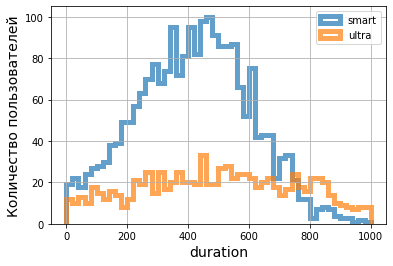

Данные для тарифа Смарт
count    2223.000000
mean      419.465137
std       188.909137
min         2.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: duration, dtype: float64
Стандартное отклонение равно 188.90913698882778
Дисперсия равна 35686.6620378637

Данные для тарифа Ультра
count     953.000000
mean      547.120672
std       304.653473
min         1.000000
25%       311.000000
50%       526.000000
75%       756.000000
max      1673.000000
Name: duration, dtype: float64
Стандартное отклонение равно 304.65347293989356
Дисперсия равна 92813.73857433845

График для параметра messages_used


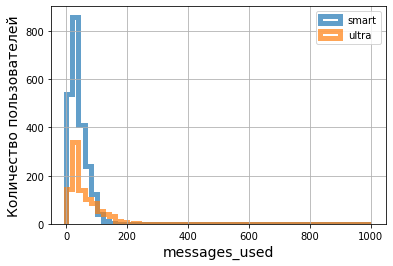

Данные для тарифа Смарт
count    2223.000000
mean       38.644175
std        24.895493
min         1.000000
25%        20.000000
50%        38.000000
75%        51.000000
max       143.000000
Name: messages_used, dtype: float64
Стандартное отклонение равно 24.895493015491255
Дисперсия равна 619.7855724843739

Данные для тарифа Ультра
count    953.000000
mean      56.187828
std       40.704889
min        1.000000
25%       31.000000
50%       38.000000
75%       78.000000
max      224.000000
Name: messages_used, dtype: float64
Стандартное отклонение равно 40.70488917740895
Дисперсия равна 1656.8880029451445

График для параметра gb_used


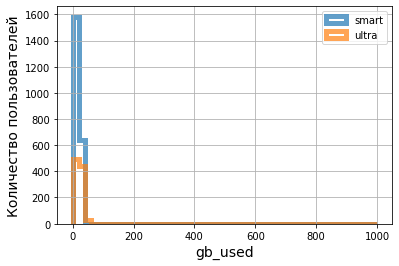

Данные для тарифа Смарт
count    2223.000000
mean       16.339631
std         5.739569
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64
Стандартное отклонение равно 5.7395691989334505
Дисперсия равна 32.94265458934557

Данные для тарифа Ультра
count    953.000000
mean      19.660021
std        9.658988
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64
Стандартное отклонение равно 9.658988433712109
Дисперсия равна 93.29605756258431



In [216]:
#строю гистограммы в цикле для использованных минут, смс, гб для 2х срезов на одном графике
parameters=['duration', 'messages_used','gb_used']
for i in parameters:
    print("График для параметра", i)
    ax = smart.plot(kind='hist', y=i, histtype='step', range=(0, 1000), bins=50, linewidth=5, alpha=0.7, label='smart')
    ultra.plot(kind='hist', y=i, histtype='step', range=(0, 1000), bins=50, linewidth=5, alpha=0.7, label='ultra', ax=ax, grid=True, legend=True)
    plt.xlabel(i,fontsize=14)
    plt.ylabel('Количество пользователей',fontsize=14)
    plt.show()
    print("Данные для тарифа Смарт")
    print(smart[i].describe())#применяю метод describe() там же
    standard_deviation = np.std(smart[i], ddof=1)
    print ("Стандартное отклонение равно", standard_deviation)
    variance=np.var(smart[i], ddof=1)
    print("Дисперсия равна", variance)
    
    print()
    print("Данные для тарифа Ультра")
    print(ultra[i].describe())
    standard_deviation = np.std(ultra[i], ddof=1)
    print ("Стандартное отклонение равно", standard_deviation)
    variance=np.var(ultra[i], ddof=1)
    print("Дисперсия равна", variance)
    print()

# Вывод: 

Для удобства восприятия данных гистограммы были построены на одном графике. 

Для параметра минуты разговора средним значением для Смарт является 419 минут, что на 30% меньше, чем среднее значение у тарифа Ультра - 547 минут. Стандартное отклонение по тарифу Смарт равно 188.90913698882778, Дисперсия равна 35686.6620378637. По тарифу Ультра Стандартное отклонение равно 304.65347293989356, Дисперсия равна 92813.73857433845. Данные обоих тарифов распределены нормально.
Так как количество пользователей тарифа Смарт 2223 человек, что в 2,3 раза больше, чем количество пользователей тарифа Ультра 953 человек, купол гистограммы тарифа Смарт значительно выше, чем у тарифа Ультра.

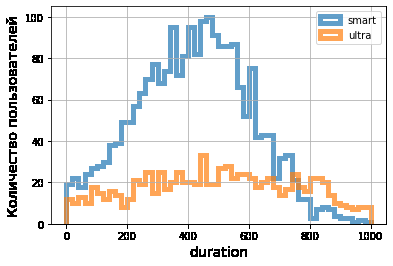

Для параметра количество сообщений для тарифа Смарт средним значением является 38 сообщений, у Тарифа Ультра 56 сообщений, что больше на 47%. Стандартное отклонение равно 24.895493015491255 и Дисперсия равна 619.7855724843739 у тарифа Смарт.
Стандартное отклонение равно 40.70488917740895 и Дисперсия равна 1656.8880029451445 у Тарифа Ультра.
Гистограмма для параметра количество сообщенийимеет распределение с дополнительными значениями справа, отображает частоту значений в скошенном вправо наборе данных. Его также называют датасетом с положительной скошенностью, ведь дополнительные значения находятся со стороны положительного направления оси.

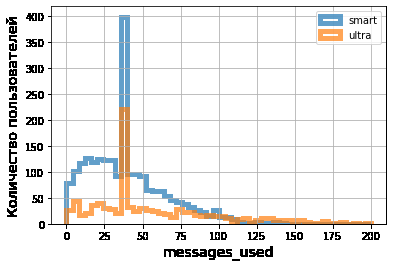

Для параметра объем трафика для тарифа Смарт среднее значение 16 Гб, для тарифа Ультра 19 Гб. Для тарифа Смарт стандартное отклонение равно 5.7395691989334505, дисперсия равна 32.94265458934557.
Для тарифа Ультра стандартное отклонение равно 9.658988433712109, дисперсия равна 93.29605756258431.
Распределение гистограммы нормальное.

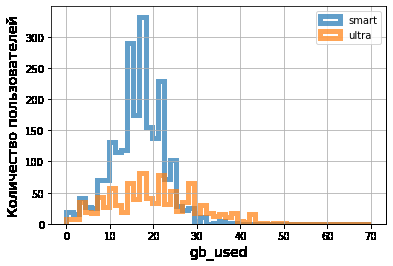

# Шаг 4. Проверим гипотезы

In [217]:
#Н0 Размер средней выручки пользователей тарифов «Ультра» равен размеру средней выручки пользователей тарифов «Смарт» 
#H1 Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается    
smart_revenue_mean = smart['revenue_total']
ultra_revenue_mean= ultra['revenue_total']
    
alpha = .05 # критический уровень статистической значимости
    
results = st.ttest_ind(
    smart_revenue_mean, 
    ultra_revenue_mean)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha): #сравним получившееся p-значение с заданным уровнем статистической значимости)
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.243578945624517e-155
Отвергаем нулевую гипотезу


Вывод: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

За нулевую гипотезу принимаем положительное предположение о том, что размер средней выручки пользователей тарифов «Ультра» равен размеру средней выручки пользователей тарифов «Смарт». За альтернативную гипотезу берем: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
Для проверки использовали сравнение p-значения с заданным уровнем статистической значимости. За уровень значимости используется значение 0.05, такую вероятность ошибки считаем допустимой.

In [218]:
#H0 Cредняя выручка пользователей из Москвы равна выручке пользователей из других регионов
#H1 средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
moscow = data_final_tariffs.query('city=="Москва"')
regions=data_final_tariffs.query('city!="Москва"')
moscow_revenue_mean=moscow['revenue_total']
regions_revenue_mean= regions['revenue_total']
    
alpha = .05 # критический уровень статистической значимости
    
results = st.ttest_ind(
    moscow_revenue_mean, 
    regions_revenue_mean)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha): #сравним получившееся p-значение с заданным уровнем статистической значимости)
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.4687688284421999
Не получилось отвергнуть нулевую гипотезу


Вывод: Cредняя выручка пользователей из Москвы равна выручке пользователей из других регионов

За нулевую гипотезу принимаем положительное предположение о том, что Cредняя выручка пользователей из Москвы равна выручке пользователей из других регионов. За альтернативную гипотезу берем: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Для проверки использовали сравнение p-значения с заданным уровнем статистической значимости. За уровень значимости используется значение 0.05, такую вероятность ошибки считаем допустимой.

# Общий вывод
В данном проекте нашей задачей было понять, какой тариф приносит «Мегалайну» больше денег, для того чтобы скорретировать рекламный бюджет. Были проанализированы данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 
Общий доход от клиентов Смарт 2869851.0, что на 45% больше, чем общий доход от клиентов Ультра 1973400.0. В основном это из-за того, что пользователей Смарта в 2,33 раза больше. но так же проанализировав среднюю выручку пользователей разных тарифов, можно сделать вывод о том, что пользователи ультра редко превышают лимит своего тарифа. Средняя выручка тарифа Смарт превышает стоимость тарифа в 2 раза, что говорит о том, что пользователям не хватает лимитов по тарифу, но тем не менее они предпочитают оставаться на тарифе Смарт и доплачивать разницу за перерасход минут, смс и гб. 